<a href="https://colab.research.google.com/github/GIHYEON-KIM/Hello/blob/main/AI_01_%EA%B9%80%EA%B8%B0%ED%98%84_N214a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# Logistic Regression

이번에는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 봅시다. 데이터에 대한 설명을 캐글 페이지에서 잘 살펴보시고 과제를 진행해 주세요!

### 1) EDA를 수행합시다

- gender : 1 - 여성, 2 - 남성
- cholesterol : 1 - 정상, 2 - 평균 이상, 3 - 평균보다 매우 높음
- gluc : 1 - 정상, 2 - 평균 이상, 3 - 평균보다 매우 높음
- ap_hi : 최대 혈압
- ap_lo : 최소 혈압

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df = pd.read_csv('./data/cardio_train.csv', sep = ';')
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### age를 나이 단위로 변경

In [ ]:
df = df.copy()
df['age'] = df['age']//365
df = df.drop('id', axis = 1)
print(df.shape)
df.head()

(70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


- 아무래도 심혈관 질환이다 보니 나이에 영향을 많이 받을 것이다.

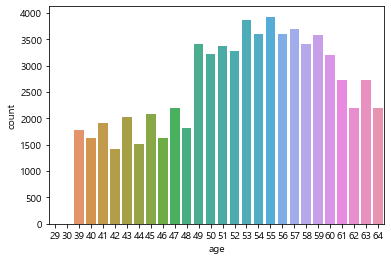

In [ ]:
sns.countplot(df['age'])

In [ ]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


- 상관관계를 본 결과, 역시 나이가 연관성이 가장 컸고, 콜레스테롤 수치 또한 영향이 컸다.
- 그리고 활동성(active)과는 음의 상관관계가 나타났다.

In [ ]:
df_car = df[df['cardio'] == 1]
df_x = df[df['cardio'] == 0]

df_car.shape, df_x.shape

((34979, 12), (35021, 12))

#### 나이와 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

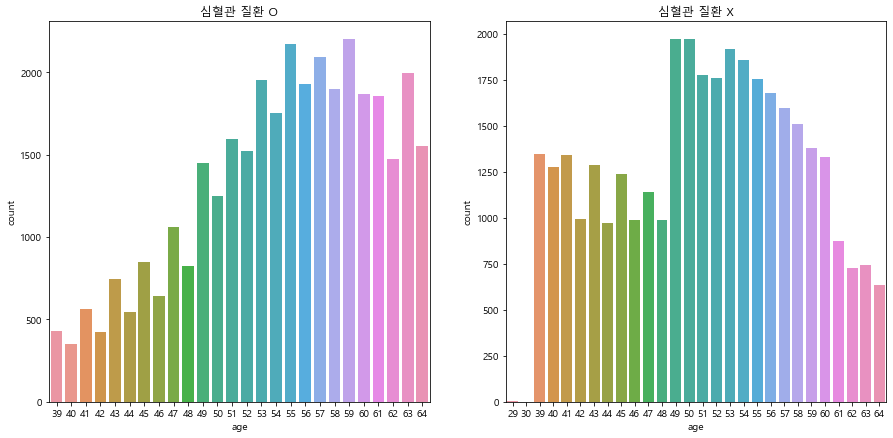

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,7))

ax1 = sns.countplot(df_car['age'], ax = axes[0])
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['age'], ax = axes[1])
ax2.set_title ('심혈관 질환 X')

- bin으로 쪼개서 5단위, 10단위 등으로 다시 보기

#### 키와 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

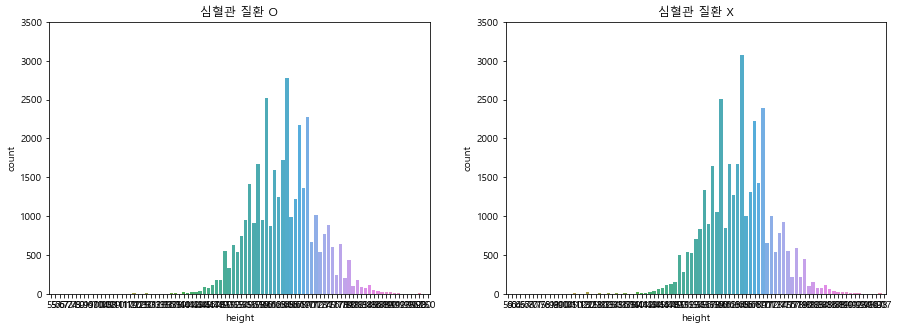

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['height'], ax = axes[0])
ax1.set(ylim = (0,3500))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['height'], ax = axes[1])
ax2.set(ylim = (0,3500))
ax2.set_title ('심혈관 질환 X')

#### 몸무게와 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

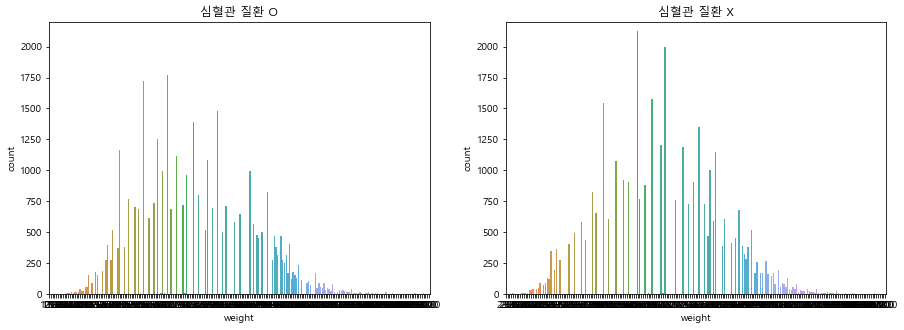

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['weight'], ax = axes[0])
ax1.set(ylim = (0,2200), xlim = (0,None))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['weight'], ax = axes[1])
ax2.set(ylim = (0,2200), xlim = (0,None))
ax2.set_title ('심혈관 질환 X')

#### 최대 혈압/ 최소 혈압과 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

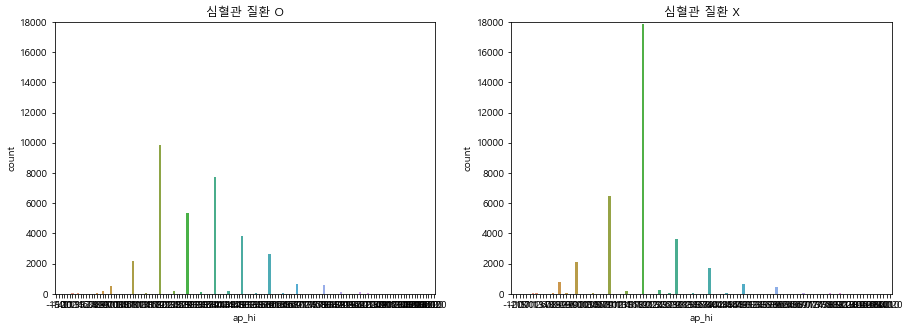

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['ap_hi'], ax = axes[0])
ax1.set(ylim = (0,18000))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['ap_hi'], ax = axes[1])
ax2.set(ylim = (0,18000))
ax2.set_title ('심혈관 질환 X')

Text(0.5, 1.0, '심혈관 질환 X')

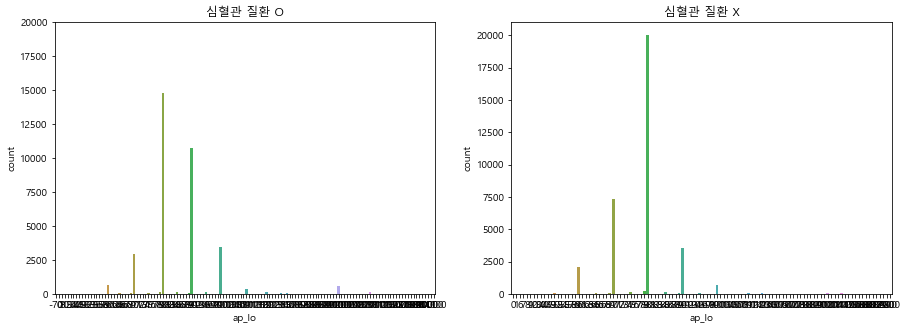

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['ap_lo'], ax = axes[0])
ax1.set(ylim = (0,20000))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['ap_lo'], ax = axes[1])
ax2.set(ylim = (0,None))
ax2.set_title ('심혈관 질환 X')

**혈압을 수치로만 보니 분포와 관계를 파악하기 힘들어서 순위형으로 변경하기로 함**

- 최대 혈압이 140 이상 : 고혈압, 130 이상 : 고혈압 전단계, 120 이상 : 주의 혈압, 120 미만 : 정상
- 최소 혈압이 90 이상 : 고혈압, 80 이상 : 고혈압 전단계, 80미만 : 정상
- 으로 순위형 변수로 변환 후 관측 (네이버 혈압 정보 참조)

In [ ]:
def trans_aph(x):
    if x>=140:
        return 4
    elif x>=130:
        return 3
    elif x>=120:
        return 2
    else:
        return 1
    
def trans_apl(x):
    if x>=90:
        return 3
    elif x >= 80 :
        return 2
    else:
        return 1

In [ ]:
df_car['ap_hi'] = df_car['ap_hi'].apply(trans_aph)
df_car['ap_lo'] = df_car['ap_lo'].apply(trans_apl)
df_x['ap_hi'] = df_x['ap_hi'].apply(trans_aph)
df_x['ap_lo'] = df_x['ap_lo'].apply(trans_apl)

<ipython-input-14-fb75c9b3e2de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['ap_hi'] = df_car['ap_hi'].apply(trans_aph)
<ipython-input-14-fb75c9b3e2de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['ap_lo'] = df_car['ap_lo'].apply(trans_apl)
<ipython-input-14-fb75c9b3e2de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

Text(0.5, 1.0, '심혈관 질환 X')

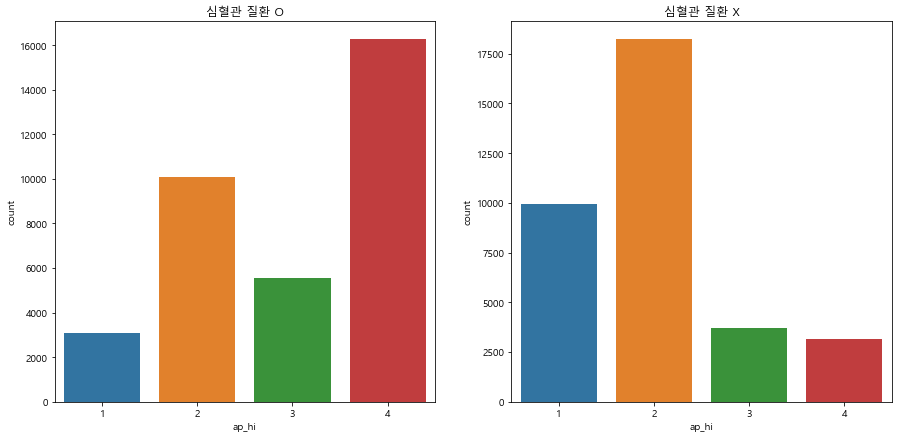

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,7))
ax1 = sns.countplot(df_car['ap_hi'], ax = axes[0])
ax2 = sns.countplot(df_x['ap_hi'], ax = axes[1])
ax1.set_title('심혈관 질환 O')
ax2.set_title ('심혈관 질환 X')

Text(0.5, 1.0, '심혈관 질환 X')

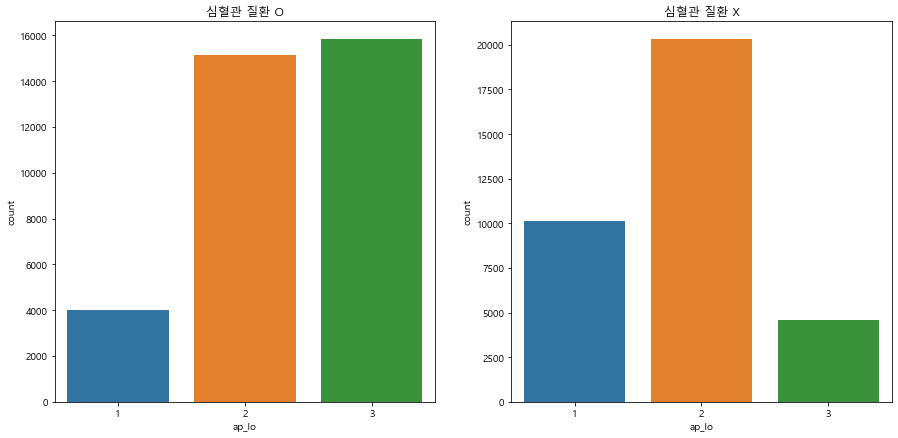

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,7))
ax1 = sns.countplot(df_car['ap_lo'], ax = axes[0])
ax2 = sns.countplot(df_x['ap_lo'], ax = axes[1])
ax1.set_title('심혈관 질환 O')
ax2.set_title ('심혈관 질환 X')

- 최대 혈압과 최소 혈압 모두 심혈관 질환이 있는 환장의 경우 정상치보다 높은 경우가 많았다.
- 따라서 혈압에 관계가 있을 것 같다.

In [ ]:
df_c = df.copy()
df_c['ap_hi'] = df_c['ap_hi'].apply(trans_aph)
df_c['ap_lo'] = df_c['ap_lo'].apply(trans_apl)

In [ ]:
df_c.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.217114,0.163587,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.057059,0.064475,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.013054,0.032967,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.269606,0.242741,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.217114,0.057059,0.013054,0.269606,1.000000,0.716851,0.214204,0.100069,0.027558,0.030651,-0.001467,0.460144
ap_lo,0.163587,0.064475,0.032967,0.242741,0.716851,1.000000,0.161294,0.072886,0.024100,0.034658,0.004390,0.355168
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.214204,0.161294,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.100069,0.072886,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,0.027558,0.024100,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.030651,0.034658,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


- 혈압 변수를 순위형 데이터로 바꾸니 상관관계가 0.46과 0.355로 매우 올라갔다.
- 따라서 이 변수를 사용해 볼 것이다.

#### 성별과 심혈관 질환

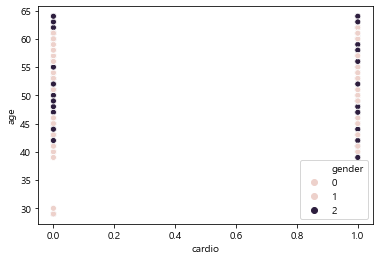

In [ ]:
sns.scatterplot(data = df, x = 'cardio', y = 'age', hue = 'gender')

Text(0.5, 1.0, '심혈관 질환 X')

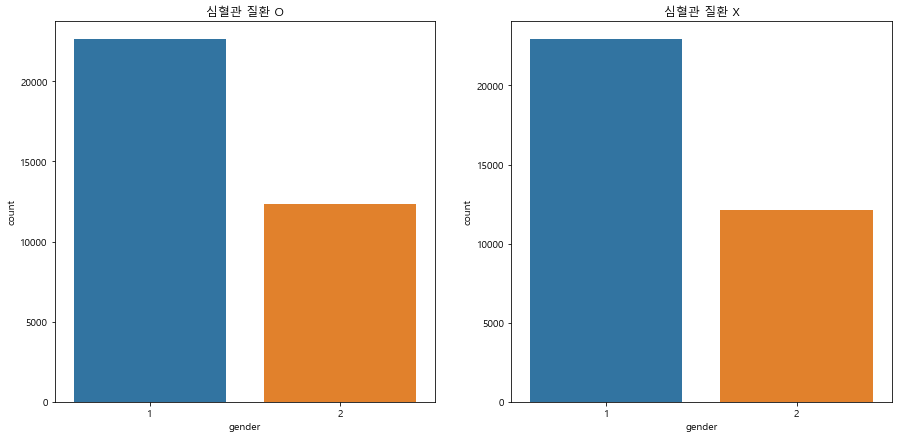

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,7))
ax1 = sns.countplot(df_car['gender'], ax = axes[0])
ax2 = sns.countplot(df_x['gender'], ax = axes[1])
ax1.set_title('심혈관 질환 O')
ax2.set_title ('심혈관 질환 X')

- 데이터 상에서는 심혈관질환 환자의 나이와 성별 모두 고르게 분포되어 있는 것 같다. (이것들만으로 예측을 하기 힘들 것임)

#### 활동성과 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

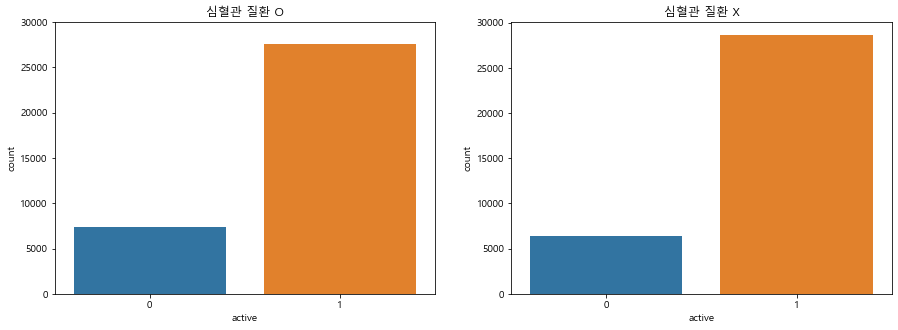

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['active'], ax = axes[0])
ax1.set(ylim = (0,30000))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['active'], ax = axes[1])
ax2.set_title ('심혈관 질환 X')

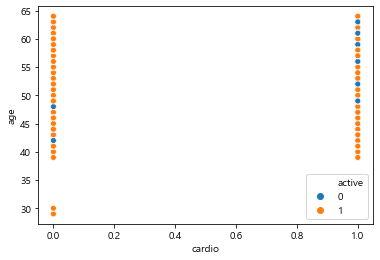

In [ ]:
sns.scatterplot(data = df, x = 'cardio', y = 'age', hue = 'active')

- 활동성이 낮은 고연령대 사람들이 심혈관 질환에 걸린 그룹에 많이 분포된 것으로 보인다.

#### 콜레스테롤 수치와 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

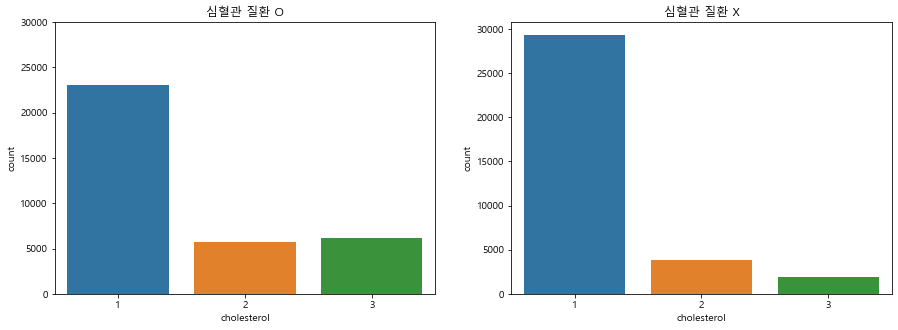

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['cholesterol'], ax = axes[0])
ax1.set(ylim = (0,30000))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['cholesterol'], ax = axes[1])
ax2.set_title ('심혈관 질환 X')

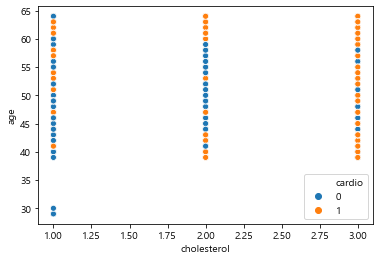

In [ ]:
sns.scatterplot(data = df, y = 'age', x = 'cholesterol', hue = 'cardio')

- 나이가 적더라도 콜레스테롤 수치가 높은 사람일 수록 심혈관 질환에 걸린 사람이 많았다.

#### 포도당과 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

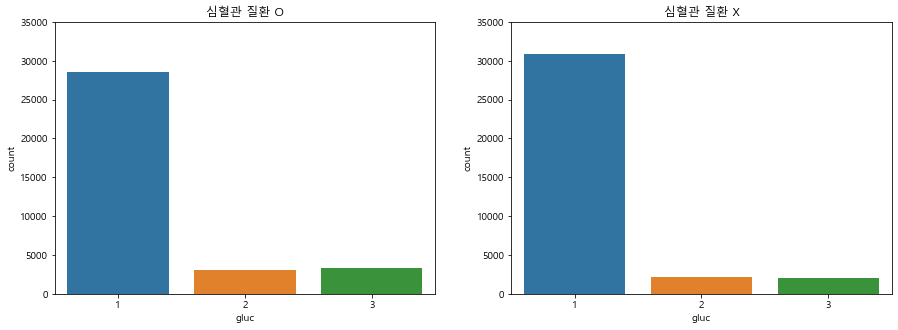

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['gluc'], ax = axes[0])
ax1.set(ylim = (0,35000))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['gluc'], ax = axes[1])
ax2.set(ylim = (0,35000))
ax2.set_title ('심혈관 질환 X')

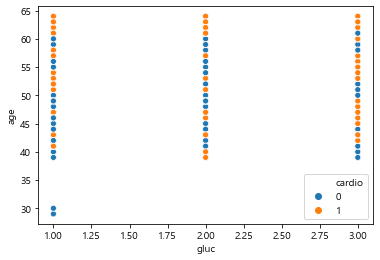

In [ ]:
sns.scatterplot(data = df, y = 'age', x = 'gluc', hue = 'cardio')

#### 흡연여부와 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

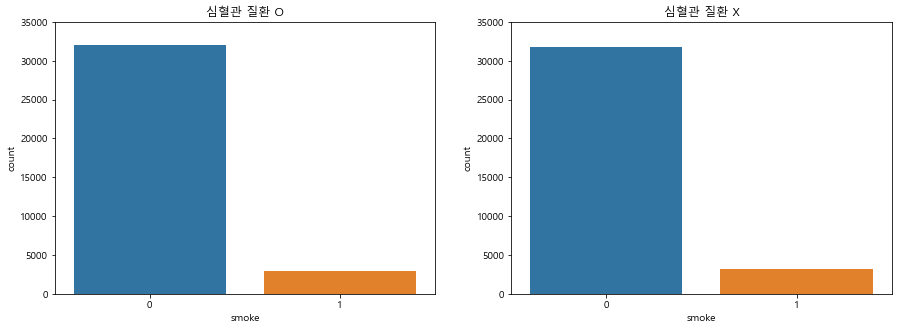

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['smoke'], ax = axes[0])
ax1.set(ylim = (0,35000))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['smoke'], ax = axes[1])
ax2.set(ylim = (0,35000))
ax2.set_title ('심혈관 질환 X')

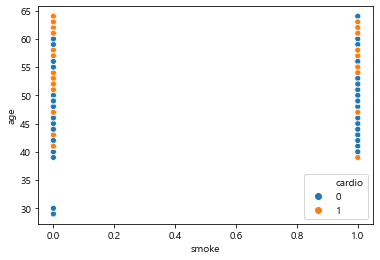

In [ ]:
sns.scatterplot(data = df, y = 'age', x = 'smoke', hue = 'cardio')

- 흡연 여부는 크게 상관이 있어 보이지 않는다.

#### 음주여부와 심혈관 질환

Text(0.5, 1.0, '심혈관 질환 X')

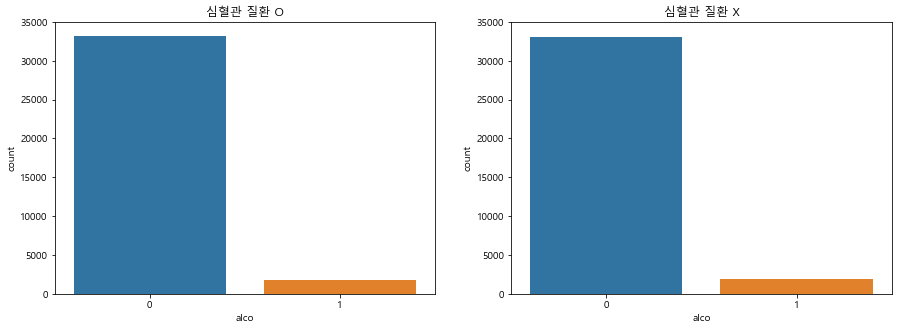

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax1 = sns.countplot(df_car['alco'], ax = axes[0])
ax1.set(ylim = (0,35000))
ax1.set_title('심혈관 질환 O')
ax2 = sns.countplot(df_x['alco'], ax = axes[1])
ax2.set(ylim = (0,35000))
ax2.set_title ('심혈관 질환 X')

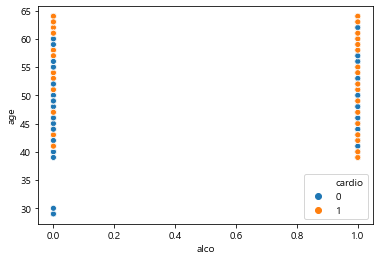

In [ ]:
sns.scatterplot(data = df, y = 'age', x = 'alco', hue = 'cardio')

- 음주여부도 크게 상관있어 보이지 않는다.

- 음주여부와 흡연여부, 키, 성별 feature은 사용하지 않기로 하자.

In [ ]:
df_c = df_c.drop(['smoke', 'alco', 'height', 'gender'], axis = 1)
df_c.head()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,active,cardio
0,50,62.0,1,2,1,1,1,0
1,55,85.0,4,3,3,1,1,1
2,51,64.0,3,1,3,1,0,1
3,48,82.0,4,3,1,1,1,1
4,47,56.0,1,1,1,1,0,0


### 2) 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 주세요

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_c, random_state=2, train_size = 0.8, stratify = df['cardio'])
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (56000, 8)
test shape:  (14000, 8)


In [ ]:
train, val = train_test_split(train, random_state = 2, train_size = 0.8, stratify = train['cardio'])
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (44800, 8)
val shape:  (11200, 8)


### 3) 분류모델과 비교하기 위한 기준모델은 어떻게 설정해야 할까요?

- 우선 기준 모델로 train dataset에서 가장 많이 나온 cardio 값을 확인한 뒤, 모든 예측값을 해당 값으로 예측했다고 가정하여 만들어본다.

In [ ]:
# 타겟 정하기
target = 'cardio'
y_train = train[target]
y_val = val[target]
y_test = test[target]

x_train = train.drop(target, axis =1)
x_val = val.drop(target, axis =1)
x_test = test.drop(target, axis =1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44800, 7), (44800,), (14000, 7), (14000,))

In [ ]:
# 타겟의 비율 확인
y_train.value_counts(normalize=True)

0    0.500313
1    0.499688
Name: cardio, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = [0]*len(y_train)
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5003125


- 기준 모델의 경우 정확도가 0.5로 딱 절반이다.

In [ ]:
# 검증 데이터 셋에서 확인
y_pred = [0] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.5002678571428572


- 검증 데이터셋도 비슷한 결과를 보인다.

### 4) 사이킷런의 LogisticRegression을 사용해 모델을 만들어 보세요

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

print('학습세트 정확도', logistic.score(x_train, y_train))
print('검증세트 정확도', logistic.score(x_val, y_val))

학습세트 정확도 0.7279241071428572
검증세트 정확도 0.7311607142857143


C:\Users\GIHYEON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정확도가 0.731로, 기준 모델보다 훨씬 높게 나왔다.
- 그리고 학습세트의 정확도가 검증세트보다 오히려 낮게 나왔다.

### 5) 데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩 하세요

- 범주형 성질을 지닌 특성은 음주여부(alco), 흡연여부(smoke), 성별(gender)등 많지만, 그 자체로 이미 원핫인코딩이 되어 있는거라고 볼 수 있다.
- 이런 경우, 오히려 하지 않는 것이 더 좋을 수 있다.
- 따라서 한 가지 feature만 골라서 원핫인코딩으로 바꿔보기만 하려고 한다.

In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
def tran_g(x):
    if x == 1:
        return 'a'
    else:
        return 'n'

x_train['active'] = x_train['active'].apply(tran_g)
x_val['active'] = x_val['active'].apply(tran_g)
x_test['active'] = x_test['active'].apply(tran_g)

In [ ]:
encoder = OneHotEncoder(use_cat_names=True)
x_train_en = encoder.fit_transform(x_train)
x_val_en = encoder.transform(x_val)
x_test_en = encoder.transform(x_test)
x_train_en.head()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,active_a,active_n
59398,62,63.0,2,2,1,1,1,0
63604,53,50.0,1,1,1,1,1,0
2165,55,110.0,4,2,3,3,1,0
63993,53,119.0,4,3,3,3,1,0
20965,57,65.0,1,2,1,1,1,0


### 6) [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html) 을 진행하세요 (여러가지 종류의 Scalar를 어떤 상황에 적용해야 하는지 알아보고 사용해 보세요)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_en)
x_val_scaled = scaler.transform(x_val_en)
x_test_scaled = scaler.transform(x_test_en)

### 7) 검증세트에서 정확도를 확인해 보세요

### 8) 학습한 모델을 검증세트에서 최적화 시킨 후, 테스트세트에서 딱 한 번 정확도를 확인해 보세요

## 🔥 도전과제:

### 9) 로지스틱회귀모델의 계수(coeffients)를 해석하는 방법에 대해서 예제를 들어 논하세요.